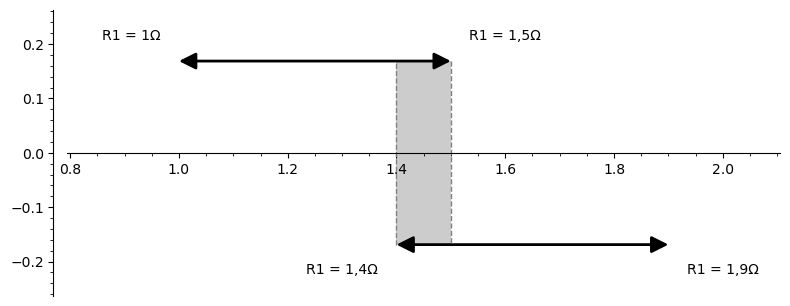

In [4]:
#TODO
#Make exageration factor to make small intersections or non intersections visible
#Mode for non-domain values
#Allow selection of domain - x axis - domain or domain - domain -x axis orders
#Add labels for intersected
#support scientific numbers

#Defining the start and end values for the values' domains
s1 = 1
e1 = 1.5
s2 = 1.4
e2 = 1.9

#Defining the units and value name
units = "Ω"
val_name = "R1"
decimal_divide = ","
intersection_labels = false

#Defining the colors of the value domains, intersection domain and text
h_color = "black"
v_color = "grey"
d_color = "grey"
t_color = "black"

#find span for min max
vals = [s1, e1, s2, e2]
min = s1
max = s1
for i in range(len(vals)-1):
    i+= 1
    n = vals[i]
    if max < n:
        max = n
    if min > n:
        min = n

#Parameters that autotune themselves
frame_width = (max - min)
frame_height = (max - min) * 9 / 16
height_dist = frame_height / 3

#Make graph limits
xmin = min - ((max - min) / 5)
xmax = max + ((max - min) / 5)
ymin = -frame_height / 2
ymax = frame_height / 2

#Flip inverted domains
if s1 > e1:
    temp = s1
    s1 = e1
    e1 = temp
    show("Inverted domain 1")
elif s2 > e2:
    temp = s2
    s2 = e2
    e2 = temp
    show("Inverted domain 2")

#Arrows for each domain to be displayed
v1 = arrow((s1, height_dist), (e1, height_dist), head=2, color=h_color)
v2 = arrow((s2, -height_dist), (e2, -height_dist), head=2, color=h_color)

#Find included start and end values to determine domain intersection
intersect = []
if s1 >= s2 and s1 <= e2:
    intersect.append(s1)
if e1 >= s2 and e1 <= e2:
    intersect.append(e1)
if len(intersect) < 2 and s2 >= s1 and s2 <= e1:
    intersect.append(s2)
if len(intersect) < 2 and e2 >= s1 and e2 <= e1:
    intersect.append(e2)
intersect = list(set(intersect))

#Remove trailing zeros
def detrail(n) -> str :
    num = str(n).split(".")
    if len(num) >= 2:
        output_num = ""
        for i in range(len(num[1])-1, -1, -1):
            if num[1][i] != "0":
                for j in range(i+1):
                    output_num += num[1][j]
                return str(num[0]) + decimal_divide + str(output_num)
    else:
        return str(n)

#label maker
def label_maker(val_name, s1, e1, s2, e2, height_dist, t_color):
    if val_name != "":
        val_name += " = "
    t1 = text(val_name + detrail(s1) + units, (s1 - height_dist/5, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="bottom")
    t2 = text(val_name + detrail(e1) + units, (e1 + height_dist/5, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="bottom")
    t3 = text(val_name + detrail(s2) + units, (s2 - height_dist/5, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="top")
    t4 = text(val_name + detrail(e2) + units, (e2 + height_dist/5, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="top")
    return [t1, t2, t3, t4]

#if an intersection exists, display the graph with intersection highlighted and dotted lines
#if the intersection is a single value, only display dotted line
#otherwise notify user and display the domains on the graph
if len(intersect) == 2:

    p1 = ([intersect[0], height_dist])
    p2 = ([intersect[0], -height_dist])
    p3 = ([intersect[1], -height_dist])
    p4 = ([intersect[1], height_dist])
    
    l1 = line([(intersect[0], height_dist), (intersect[0], -height_dist)], linestyle='dashed', color=v_color)
    l2 = line([(intersect[1], -height_dist), (intersect[1], height_dist)], linestyle='dashed', color=v_color)
    
    a = polygon([p1, p2, p3, p4], color=d_color, alpha=0.4)

    labels = label_maker(val_name, s1, e1, s2, e2, height_dist, t_color)
    show(v1 + v2 + l1 + l2 + a + labels[0] + labels[1] + labels[2] + labels[3], xmin=xmin, xmax=xmax , ymin=ymin, ymax=ymax, figsize=8, aspect_ratio=1)
         
elif len(intersect) == 1:
    show("Single value intersection")
    
    l1 = line([(intersect[0], height_dist), (intersect[0], -height_dist)], linestyle='dashed', color=v_color)

    labels = label_maker(val_name, s1, e1, s2, e2, height_dist, t_color)
    show(v1 + v2 + l1 + labels[0] + labels[1] + labels[2] + labels[3], xmin=xmin, xmax=xmax , ymin=ymin, ymax=ymax, figsize=8, aspect_ratio=1)

else:
    show("The value domains do not intersect and are incoherent")
    
    labels = label_maker(val_name, s1, e1, s2, e2, height_dist, t_color)
    show(v1 + v2 + labels[0] + labels[1] + labels[2] + labels[3], xmin=xmin, xmax=xmax , ymin=ymin, ymax=ymax, figsize=8, aspect_ratio=1)

2.80000000000000 0.700000000000000 0.421875000000000 -0.421875000000000


'The value domains do not intersect and are incoherent'

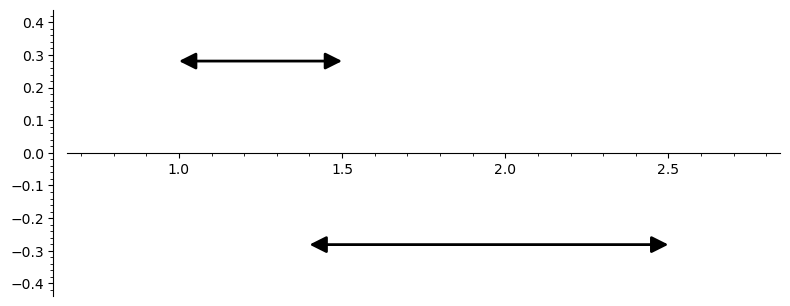

In [1]:
# stub for a mode that takes a single value (like a theoretical one without uncertainty) instead of a second domain

#Defining the start and end values for the values' domains
s1 = 1
e1 = 1.5
s2 = 1.4
e2 = 2.5

#Defining the units and value name
units = "Ω"
val_name = "R"
decimal_divide = ","

#Defining the colors of the value domains, intersection domain and text
h_color = "black"
v_color = "grey"
d_color = "grey"
t_color = "black"

#find span for min max
vals = [s1, e1, s2, e2]
min = s1
max = s1
for i in range(len(vals)-1):
    i+= 1
    n = vals[i]
    if max < n:
        max = n
    if min > n:
        min = n

#Parameters that autotune themselves
frame_width = (max - min)
frame_height = (max - min) * 9 / 16
height_dist = frame_height / 3

#Make graph limits
xmin = min - ((max - min) / 5)
xmax = max + ((max - min) / 5)
ymin = -frame_height / 2
ymax = frame_height / 2

print(xmax, xmin, ymax, ymin)
#Flip inverted domains
if s1 > e1:
    temp = s1
    s1 = e1
    e1 = temp
    show("Inverted domain 1")
elif s2 > e2:
    temp = s2
    s2 = e2
    e2 = temp
    show("Inverted domain 2")

#Arrows for each domain to be displayed
v1 = arrow((s1, height_dist), (e1, height_dist), head=2, color=h_color)
v2 = arrow((s2, -height_dist), (e2, -height_dist), head=2, color=h_color)

#Find included start and end values to determine domain intersection
intersect = []
if s1 >= s2 and s1 <= e2:
    intersect.append(s1)
if e1 >= s2 and e1 <= e2:
    intersect.append(e1)
if len(intersect) < 2 and s2 >= s1 and s2 <= e1:
    intersect.append(s2)
if len(intersect) < 2 and e2 >= s1 and e2 <= e1:
    intersect.append(e2)
intersect = list(set(intersect))

#Remove trailing zeros
def detrail(n) -> str :
    num = str(n).split(".")
    if len(num) >= 2:
        output_num = ""
        for i in range(len(num[1])-1, -1, -1):
            if num[1][i] != "0":
                for j in range(i+1):
                    output_num += num[1][j]
                return str(num[0]) + decimal_divide + str(output_num)
    else:
        return str(n)

#if the intersection is a single value, only display dotted line
#otherwise notify user and display the domains on the graph
if len(intersect) == 1:
    
    l1 = line([(intersect[0], height_dist), (intersect[0], -height_dist)], linestyle='dashed', color=v_color)

    if val_name != "":
        val_name += " = "
    t1 = text(val_name + detrail(s1) + units, (s1 - height_dist/5, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="bottom")
    t2 = text(val_name + detrail(e1) + units, (e1 + height_dist/5, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="bottom")
    t3 = text(val_name + detrail(s2) + units, (s2 - height_dist/5, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="top")
    t4 = text(val_name + detrail(e2) + units, (e2 + height_dist/5, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="top")
    
    show(v1 + v2 + l1 + t1 + t2 + t3 + t4, xmin=xmin, xmax=xmax , ymin=ymin, ymax=ymax, figsize=8, aspect_ratio=1)

else:
    show("The value domains do not intersect and are incoherent")
    
    if val_name != "":
        val_name += " = "
    t1 = text(val_name + detrail(s1) + units, (s1 - height_dist/5, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="bottom")
    t2 = text(val_name + detrail(e1) + units, (e1 + height_dist/5, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="bottom")
    t3 = text(val_name + detrail(s2) + units, (s2 - height_dist/5, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="top")
    t4 = text(val_name + detrail(e2) + units, (e2 + height_dist/5, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="top")
    
    show(v1 + v2, xmin=xmin, xmax=xmax , ymin=ymin, ymax=ymax, figsize=8, aspect_ratio=1)

In [36]:
def detrail(n) -> str :
    num = str(n).split(".")
    if len(num) >= 2:
        output_num = ""
        for i in range(len(num[1])-1, -1, -1):
            print(i)
            print(num[1][i])
            print()
            if num[1][i] != "0":
                for j in range(i+1):
                    output_num += num[1][j]
                return str(num[0]) + decimal_divide + str(output_num)
    else:
        return str(n)

show(detrail(1.5))

13
0

12
0

11
0

10
0

9
0

8
0

7
0

6
0

5
0

4
0

3
0

2
0

1
0

0
5



'1,5'